In [223]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [224]:
df = pd.read_csv('turnover.csv')

In [225]:
# feature engineering
def binary_map(feature):
    return feature.map({'yes':1, 'no':0})

binary_list = ['accident', 'left', 'promotion']
df[binary_list] = df[binary_list].apply(binary_map)

# one-hot encoding of features with more than two categories
df = pd.get_dummies(df, drop_first=False)

# replace space with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

# drop rows that contain at least one NaN cell
df.dropna(axis='rows', thresh=1)

,satisfaction,evaluation,projects,hours,tenure,accident,left,promotion,department_acct_it,department_management,department_mktg_sales,department_product_rand,department_support_hr,department_technical,salary_high,salary_low,salary_medium
0,8.5,6.4,4,238,2,0,0,0,0,0,0,0,0,1,0,1,0
1,8.5,8.9,6,145,2,1,0,0,0,0,1,0,0,0,0,1,0
2,2.4,6.7,5,254,4,0,0,0,0,1,0,0,0,0,1,0,0
3,2.0,9.4,5,274,3,0,1,0,0,0,0,1,0,0,0,1,0
4,9.8,8.8,5,236,2,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,4.7,4.9,1,135,2,0,1,0,0,0,0,1,0,0,0,1,0
12996,3.1,7.4,5,122,3,0,0,0,0,0,0,0,0,1,1,0,0
12997,5.5,9.7,3,257,3,0,0,0,0,0,0,0,1,0,0,0,1
12998,6.6,5.8,2,146,1,1,0,0,1,0,0,0,0,0,0,1,0


In [226]:
X = df.drop('left', axis=1)
y = df['left']

In [227]:
# feature scaling
sc = MinMaxScaler()
to_scale = [col for col in X.columns if X[col].nunique() > 2]

for col in to_scale:
    X[col] = sc.fit_transform(X[[col]])  

In [228]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [229]:
y_pred = lr.predict(X)

In [230]:
#10b

accuracy = lr.score(X, y)
print("Accuracy:", accuracy)

Accuracy: 0.7837692307692308


In [231]:
#10a

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[9193  695]
 [2116  996]]


In [232]:
#11
clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [233]:
#12
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [234]:
#13
clf = DecisionTreeClassifier(min_samples_leaf=130, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=130, random_state=42)

In [235]:
#14
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [236]:
y_pred = clf.predict(X)

In [237]:
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9256923076923077


In [238]:
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[9130  758]
 [ 208 2904]]


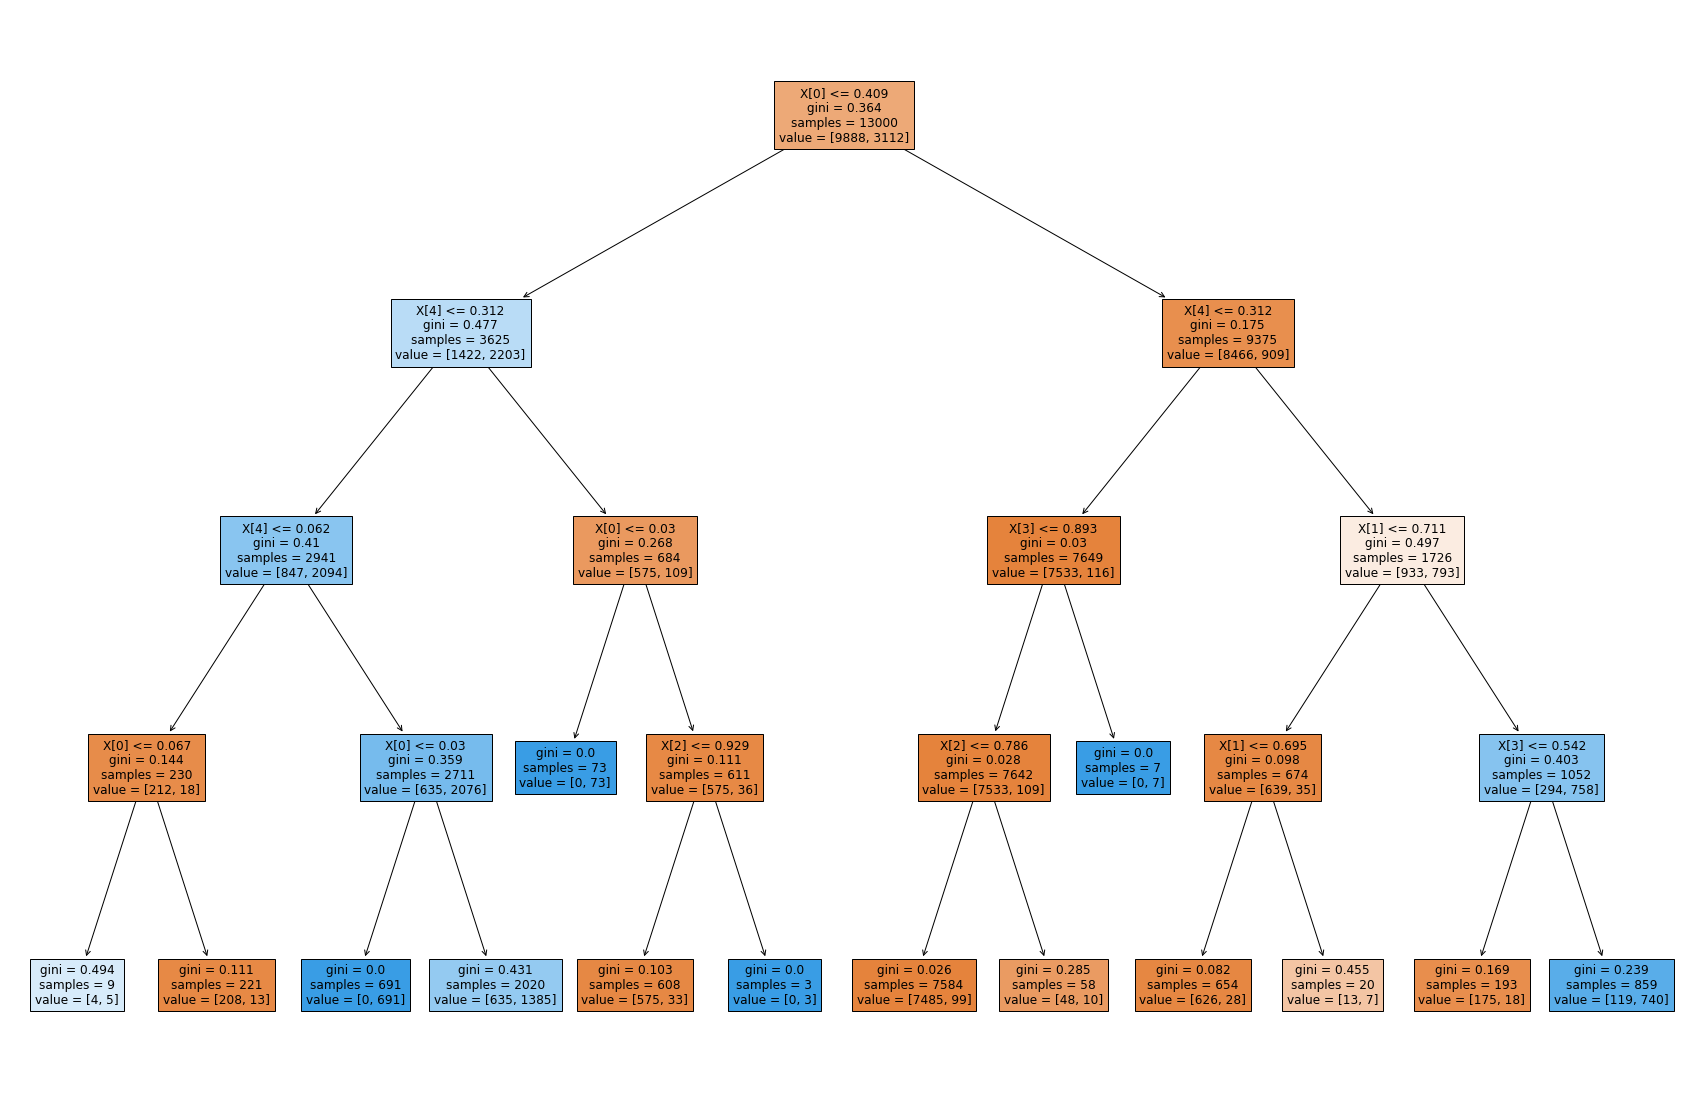

In [241]:
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True)
plt.show()